#Paquetes necesarios

In [68]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

global mouse_x 
global mouse_y 

TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

(593, 445, 3)


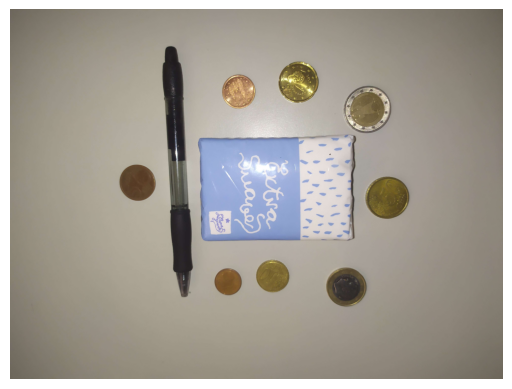

In [265]:
#Carga imagen ejemplo con monedas
img_t1 = cv2.imread('monedas1.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_t1_rgb = cv2.cvtColor(img_t1, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_t1_rgb) 
plt.show()

(0.0, 256.0)

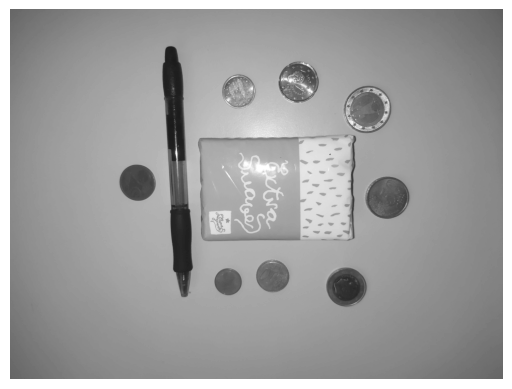

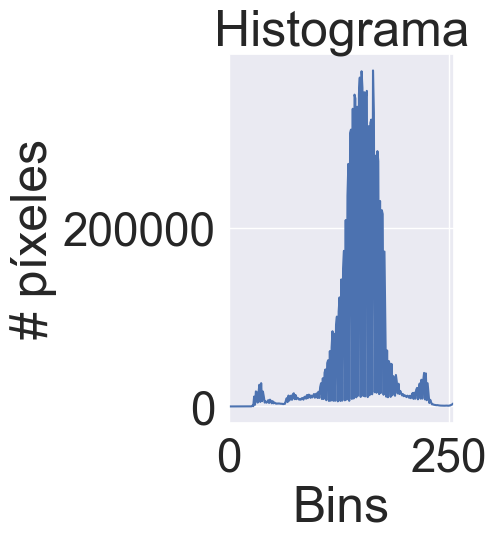

In [266]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris_t1 = cv2.cvtColor(img_t1, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris_t1], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris_t1, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Text(0.5, 1.0, 'OTSU invertida')

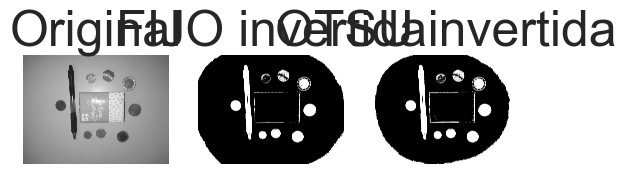

In [269]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral_t1 = 130
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1_t1 = cv2.threshold(img_gris_t1,umbral_t1,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2_t1 = cv2.threshold(img_gris_t1,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris_t1,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1_t1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2_t1,cmap='gray') 
plt.title('OTSU invertida')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


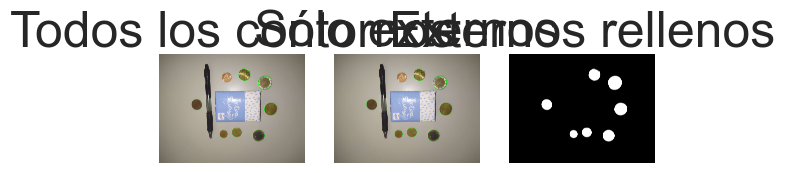

8


In [270]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1_t1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1_t1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)
contornos_circulares = []
for contornos in contornos:
     # Calcular la aproximación poligonal del contorno
    (x, y), radius = cv2.minEnclosingCircle(contornos)

    # Calcular el área del contorno
    area = cv2.contourArea(contornos)

    # Calcular la relación entre el área del contorno y el área del círculo mínimo
    circularity = area / (np.pi * radius**2)

    # Filtrar contornos circulares (por ejemplo, aquellos con alta circularidad)
    if circularity > 0.9:
        contornos_circulares.append(contornos)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb_t1 = cv2.cvtColor(img_t1, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb_t1, contornos_circulares, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb_t1) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb_t1 = cv2.cvtColor(img_t1, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb_t1, contornos_circulares, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb_t1) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb_t1.shape)
for c in contornos_circulares:

    
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 20:
            elipse = cv2.fitEllipse(c)
            
            #Para determinadas tareas nos interesará mostrar estos valores



        #Dibuja los contornos
            cv2.drawContours(img_cont, [c], -1, (255,255,255), -1) 

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()
print(len(contornos_circulares))


Una alternativa consiste en contar círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


104.5
91.1
89.8
87.3
80.8
77.4
75.1
65.7
[1.1637, 1.0145, 1.0, 0.9722, 0.8998, 0.8619, 0.8363, 0.7316]


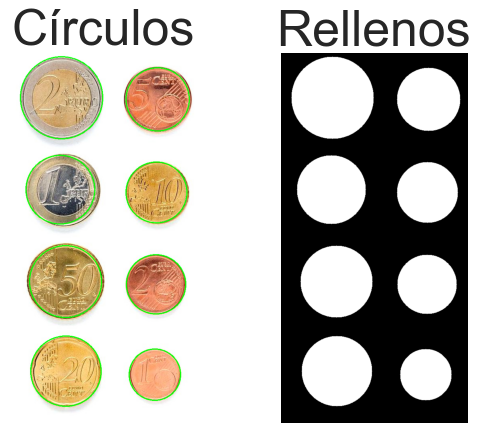

In [77]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rattio = []
comparador = []
euroRatio = 1000
ejercicio = []
number = 0
monedas = [2,0.5,1,0.2,0.05,0.1,0.02,0.01]
for det in circ[0]:
            x_coor, y_coor, det_radio = det
            hvs_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
            rgb_o = hvs_img[int(y_coor), int(x_coor)]
           #print(round((rgb[0]/rgb[1]),3))
            rattio.append(round((rgb_o[0]/rgb_o[1]),3))
            comparador.append(det_radio)
            if number == 2:
                euroRatio = det_radio
            cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
                int(det_radio),(0, 255, 0), 2)
            cv2.circle(img_cont,(int(x_coor), int(y_coor)),
                int(det_radio),(255, 255, 255), -1)
            number += 1
            
for moneda in comparador:
      print(moneda)
      euroRatio
      ejercicio.append(round((moneda/euroRatio),4))
           

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

print(ejercicio)

plt.show()

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?




(593, 445, 3)


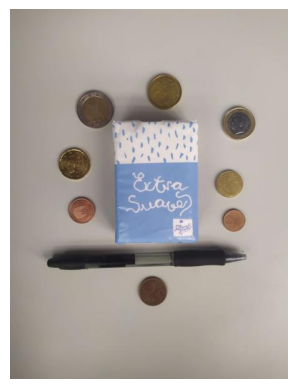

In [271]:
#Carga imagen ejemplo con monedas
img = cv2.imread('monedas2.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

(0.0, 256.0)

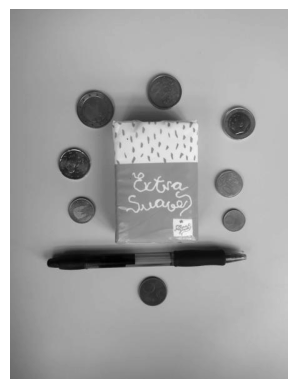

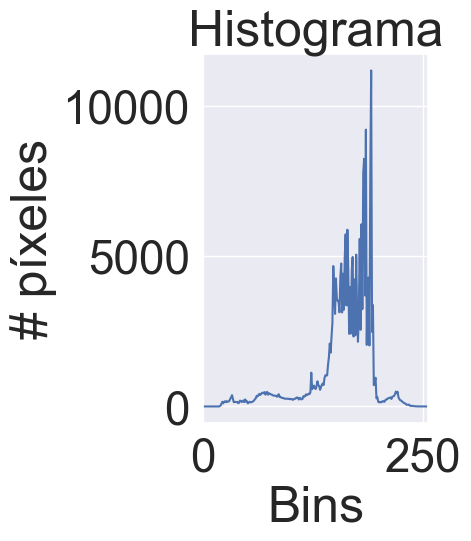

In [272]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Text(0.5, 1.0, 'OTSU invertida')

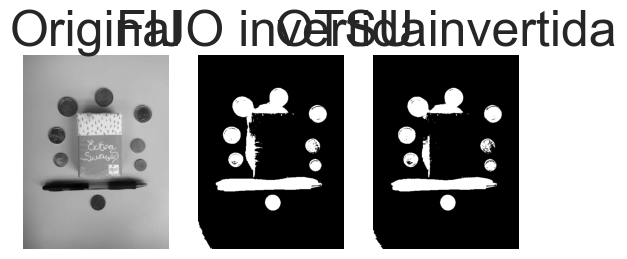

In [273]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 130
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')


(3000, 4000, 3)
[0.184, 0.136, 0.123, 6.733, 0.057, 0.116, 0.051, 0.086]
[1.2562791565590594, 1.0887292405299496, 1.0, 0.9211606643030417, 0.8249860048516514, 0.7223362567643217, 0.6663370031722337, 0.4754618398955029]
yes
0.2
1
0.02
0.1
1
0.01
0.05
0.02
[0.95, 1.0024, 0.6159, 0.7513, 1.0, 0.4333, 0.7894, 0.671]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Los euros son: 2.4 €
numero de monedas: 8


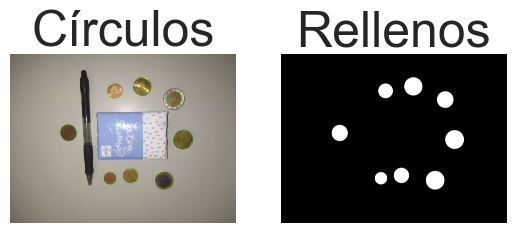

In [274]:
#Conversión a gris
import math

#Carga imagen ejemplo con monedas
img = cv2.imread('monedas1.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])



#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 120
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)






gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=40, #Umbral acumulador
        minRadius=70,  # radio mínimo
        maxRadius=170,  # radio máximo
    )
#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
number = 0
suma = 0
contar = False
comparador = []
solucionador = []
comparador_original = [1.2562791565590594, 1.0887292405299496, 1.0, 0.9211606643030417, 0.8249860048516514, 0.7223362567643217, 0.6663370031722337, 0.4754618398955029]
print(rattio)
print(comparador_original)
euroRatio = 0
error = 0.0845
for det in circ[0]:
                x_coor, y_coor, det_radio = det
                hvs_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
                rgb = hvs_img[int(y_coor), int(x_coor)]
                color = round((rgb[0]/rgb[1]),3)
                comparador.append((det_radio**2) * math.pi) #añadimos el area a una lista
                if color > 5: #si es la de 1 euro
                    euroRatio = ((det_radio**2) * math.pi) #guardamos su area
                    contar = True #es verdad que detectamos el euro
                cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
                    int(det_radio),(0, 255, 0), 2)
                cv2.circle(img_cont,(int(x_coor), int(y_coor)),
                    int(det_radio),(255, 255, 255), -1)
                number+=1    
if contar == True: #si hay una moneda de 1 euro
      print("yes")
      for moneda in comparador: #hacemos la lista de las relaciones de la imagen
            solucionador.append(round((moneda/euroRatio),4))
      for j,moneda in enumerate(solucionador): #recorremos esa lista
            a =   min(comparador_original, key=lambda x: abs(x-moneda)) #la aproximamos a la más cerca de la lista
            indice = comparador_original.index(a) 
            print(monedas[indice]) 
            suma += monedas[indice] #le sumamos ese valor
print(solucionador)
#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')
print()
print("Los euros son:" ,suma, "€")
print("numero de monedas:" ,len(circ[0]))
plt.show(comparador)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(593, 445, 3)
[0.184, 0.136, 0.123, 6.733, 0.057, 0.116, 0.051, 0.086]
[1.2562791565590594, 1.0887292405299496, 1.0, 0.9211606643030417, 0.8249860048516514, 0.7223362567643217, 0.6663370031722337, 0.4754618398955029]
0.5
0.05
0.1
0.01
2
1
0.1
0.05
[1.1723, 0.7872, 0.7028, 0.4995, 1.2133, 1.0, 0.7476, 0.8553]

Los euros son: 3.81 €
numero de monedas: 8


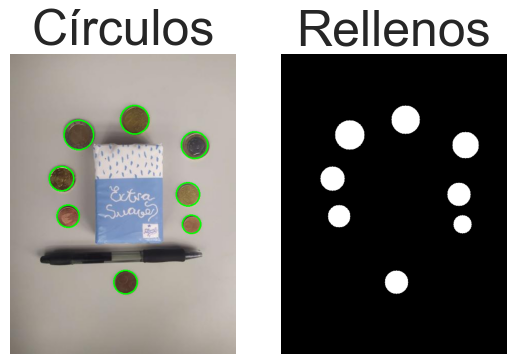

In [275]:
#Conversión a gris
import math

#Carga imagen ejemplo con monedas
img = cv2.imread('monedas2.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])



#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 130
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)






gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        10,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=40, #Umbral acumulador
        minRadius=10,  # radio mínimo
        maxRadius=150,  # radio máximo
    )
#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
number = 0
suma = 0
contar = False
comparador = []
solucionador = []
comparador_original = [1.2562791565590594, 1.0887292405299496, 1.0, 0.9211606643030417, 0.8249860048516514, 0.7223362567643217, 0.6663370031722337, 0.4754618398955029]
print(rattio)
print(comparador_original)
euroRatio = 0
error = 0.0845
for det in circ[0]:
                x_coor, y_coor, det_radio = det
                hvs_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
                rgb = hvs_img[int(y_coor), int(x_coor)]
                color = round((rgb[0]/rgb[1]),3)
                comparador.append((det_radio**2) * np.pi) #añadimos el area a una lista
                if color > 5: #si es la de 1 euro
                    euroRatio = ((det_radio**2) * np.pi) #guardamos su area
 
                    contar = True #es verdad que detectamos el euro
                cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
                    int(det_radio),(0, 255, 0), 2)
                cv2.circle(img_cont,(int(x_coor), int(y_coor)),
                    int(det_radio),(255, 255, 255), -1)
                number+=1    
if contar == True: #si hay una moneda de 1 euro
      for moneda in comparador: #hacemos la lista de las relaciones de la imagen
            solucionador.append(round((moneda/euroRatio),4))
      for j,moneda in enumerate(solucionador): #recorremos esa lista
            a =   min(comparador_original, key=lambda x: abs(x-moneda)) #la aproximamos a la más cerca de la lista
            indice = comparador_original.index(a) 
            print(monedas[indice]) 
            suma += monedas[indice] #le sumamos ese valor
print(solucionador)
#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')
print()
print("Los euros son:" ,suma, "€")
print("numero de monedas:" ,len(circ[0]))

plt.show(comparador)

(2350, 2089, 3)
[0.184, 0.136, 0.123, 6.733, 0.057, 0.116, 0.051, 0.086]
[1.2562791565590594, 1.0887292405299496, 1.0, 0.9211606643030417, 0.8249860048516514, 0.7223362567643217, 0.6663370031722337, 0.4754618398955029]
[  8 157  78]
[ 11 169  62]
[ 17 150  80]
[ 17 155  66]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 13 120  34]
[  8 182  56]
[]

Los euros son: 0 €
numero de monedas: 6


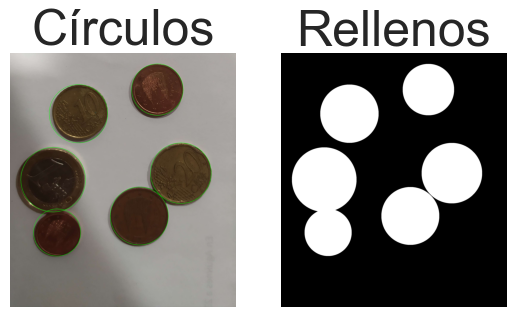

In [276]:
#Conversión a gris
import math

#Carga imagen ejemplo con monedas
img = cv2.imread('monedasSol.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])



#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 100
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)






gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=40, #Umbral acumulador
        minRadius=200,  # radio mínimo
        maxRadius=300,  # radio máximo
    )
#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
number = 0
suma = 0
contar = False
comparador = []
solucionador = []
comparador_original = [1.2562791565590594, 1.0887292405299496, 1.0, 0.9211606643030417, 0.8249860048516514, 0.7223362567643217, 0.6663370031722337, 0.4754618398955029]
print(rattio)
print(comparador_original)
euroRatio = 0
error = 0.0845
for det in circ[0]:
                x_coor, y_coor, det_radio = det
                hvs_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
                rgb = hvs_img[int(y_coor), int(x_coor)]
                color = round((rgb[0]/rgb[1]/rgb[2]),3)
                print(rgb)
                comparador.append((det_radio**2) * np.pi) #añadimos el area a una lista
                if color > 1: #si es la de 1 euro
                    euroRatio = ((det_radio**2) * np.pi) #guardamos su area

                    contar = True #es verdad que detectamos el euro
                cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
                    int(det_radio),(0, 255, 0), 2)
                cv2.circle(img_cont,(int(x_coor), int(y_coor)),
                    int(det_radio),(255, 255, 255), -1)
                number+=1    
if contar == True: #si hay una moneda de 1 euro
      for moneda in comparador: #hacemos la lista de las relaciones de la imagen
            solucionador.append(round((moneda/euroRatio),4))
      for j,moneda in enumerate(solucionador): #recorremos esa lista
            a =   min(comparador_original, key=lambda x: abs(x-moneda)) #la aproximamos a la más cerca de la lista
            indice = comparador_original.index(a) 
            print(monedas[indice]) 
            suma += monedas[indice] #le sumamos ese valor
print(solucionador)
#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')
print()
print("Los euros son:" ,suma, "€")
print("numero de monedas:" ,len(circ[0]))

plt.show(comparador)

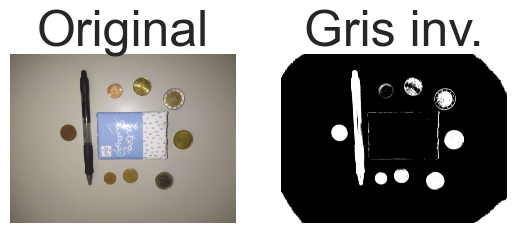

Número de monedas = 7
Mouse x = 2743 Mouse y = 2259
Coordenadas 1 euro = (0, 0)
Mouse x = 2743 Mouse y = 2259
(1769.55224609375, 2211.458740234375)
(2730.29638671875, 2254.84765625)
Area de un euro79461.5
------- Contorno = 0
---- Area moneda = 37027.0
Valor = 2
Dif = 0.7903051565590594
Valor = 0.5
Dif = 0.6227552405299496
Valor = 1
Dif = 0.534026
Valor = 0.2
Dif = 0.45518666430304167
Valor = 0.05
Dif = 0.3590120048516514
Valor = 0.1
Dif = 0.25636225676432167
Valor = 0.02
Dif = 0.20036300317223366
Valor = 0.01
Dif = 0.009487839895502892
Entra Valor = 0.01
Entra Moneda = 0.4755
Entra Ratio = 0.465974
Entra Dif = 0.009487839895502892
------- Contorno = 1
---- Area moneda = 79461.5
Valor = 2
Dif = 0.2562791565590594
Valor = 0.5
Dif = 0.08872924052994957
Valor = 1
Dif = 0.0
Entra Valor = 1
Entra Moneda = 1.0
Entra Ratio = 1.0
Entra Dif = 0.0
------- Contorno = 2
---- Area moneda = 53480.0
Valor = 2
Dif = 0.5832491565590594
Valor = 0.5
Dif = 0.41569924052994955
Valor = 1
Dif = 0.32697
Valor

In [278]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import time

#Carga imagen ejemplo con monedas
img_monedas2 = cv2.imread('monedas1.jpg')
# img_monedas2 = cv2.imread('C:\\Users\\LENOVO\\Desktop\\Uni\\VC_Practica3\\Monedas3.jpg')
#img_monedas2 = cv2.imread('C:\\Users\\LENOVO\\Desktop\\Uni\\VC_Practica3\\Monedas7.jpg')
#img_monedas2 = cv2.imread('C:\\Users\\LENOVO\\Desktop\\Uni\\VC_Practica3\\Monedas.jpg')
#print(img_monedas2.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_monedas2_rgb = cv2.cvtColor(img_monedas2, cv2.COLOR_BGR2RGB)

areas_monedas = [1.2562791565590594,    #2€
                1.0887292405299496,     #50Cents
                1.0,
                0.9211606643030417,
                0.8249860048516514,
                0.7223362567643217,
                0.6663370031722337,
                0.4754618398955029]


valores_monedas = [2,0.5,1,0.2,0.05,0.1,0.02,0.01]

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img_monedas2_rgb)
plt.title("Original")

# Imagen en gris
img_monedas2_gris = cv2.cvtColor(img_monedas2, cv2.COLOR_BGR2GRAY)


def click_event(event, x, y, flags, params):
    global mouse_x
    global mouse_y
    global check
    if event == cv2.EVENT_LBUTTONDOWN:
    #   print("X = " + str(x) + " - Y = " + str(y))
        mouse_x = x
        mouse_y = y
        check = True
        calcula_centro(centros_circulos)
    return True

global moneda_un_euro
moneda_un_euro = (0,0)

def calcula_centro(centros_circulos):
    clicked = False
    for c in centros_circulos:
        if (abs(mouse_x - c[0]) < 100 and abs(mouse_y - c[1]) < 100):
            print("Mouse x = " + str(mouse_x) + " Mouse y = " + str(mouse_y))
            return c

def dibuja_contorno(contornos_filtrados):
    area_un_euro = 1
    total = 0
    for c in contornos_filtrados:
        coord, radio = cv2.minEnclosingCircle(c)
        print(coord)

        if (coord == moneda_un_euro):
            area_un_euro = cv2.contourArea(c)
            print("Area de un euro" + str(area_un_euro))
            img_monedas2_rgb = cv2.cvtColor(img_monedas2, cv2.COLOR_BGR2RGB)
            break
    j= 0
    for c in contornos_filtrados:
        print("------- Contorno = " + str(j))
        print("---- Area moneda = " + str(cv2.contourArea(c)))
        j += 1
        for i, moneda in enumerate(areas_monedas):
            ratio = np.round(cv2.contourArea(c)/area_un_euro, 6)
            # ratio = np.round(cv2.contourArea(c), 4)/np.round(area_un_euro, 4)
            # ratio = np.round((cv2.contourArea(c)/area_un_euro),10)
            print("Valor = " + str(valores_monedas[i]))
            print("Dif = " + str(abs(ratio - moneda)))
            if(abs(ratio - moneda) < 0.05):
                total += valores_monedas[i]
                print("Entra Valor = " + str(valores_monedas[i]))
                print("Entra Moneda = " + str(np.round(moneda,4)))
                print("Entra Ratio = " + str(ratio))
                print("Entra Dif = " + str(abs(ratio - moneda)))
                break

        # valor_mas_cercano = min(areas_monedas, key=lambda x: abs(x-ratio))
        # indice = areas_monedas.index(valor_mas_cercano)
        # total += valores_monedas[indice]
        # print(valores_monedas[indice])


    print("Total = " + str(total))

#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 120
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_monedas2_threshold = cv2.threshold(img_monedas2_gris,umbral,255,cv2.THRESH_BINARY_INV)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(img_monedas2_threshold, cmap='gray')
plt.title("Gris inv.")
plt.show()

#Obtiene únicamente los contornos externos
contornos_monedas2, hierarchy_monedas2 = cv2.findContours(img_monedas2_threshold,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)

contornos_filtrados = []
centros_circulos = []
for c in contornos_monedas2:

    area = cv2.contourArea(c)

    perimetro = cv2.arcLength(c,True)
    coord,radio = cv2.minEnclosingCircle(c)
    #coord = (int(np.round(cx)), int(np.round(cy)))
    area_calculada = np.pi * radio ** 2

    # Si la diferencia entre el área devuelta por la función y el área calculada gracias al radio del círculo mínimo que envuele al contorno
    # es menor a un 15% del tamaño del área, se pinta.
    if(abs(area - area_calculada) < 0.15 * area):
        contornos_filtrados.append(c)
        centros_circulos.append(coord)

img_monedas2_rgb = cv2.cvtColor(img_monedas2, cv2.COLOR_BGR2RGB)

print("Número de monedas = " + str(len(contornos_filtrados)))

# create a window
cv2.namedWindow('Point Coordinates', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Point Coordinates', 700, 700)

check = False
cv2.setMouseCallback('Point Coordinates', click_event)

# display the image
while True:
    cv2.imshow('Point Coordinates',img_monedas2_rgb)
    if(check):
        # print("Clicked = " + str(clicked))
        print("Coordenadas 1 euro = " + str(moneda_un_euro))
        moneda_un_euro = calcula_centro(centros_circulos)
        dibuja_contorno(contornos_filtrados)
        check = False
        
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

Clasificación de microplásticos

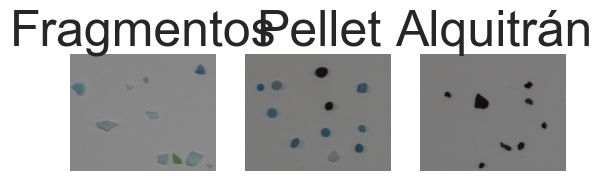

In [279]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23596\1167728326.py:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


96.21395319207087
9.22606975691659
126.07246453421456
51.56824319703238
151.35714285714286
nan
FRAG


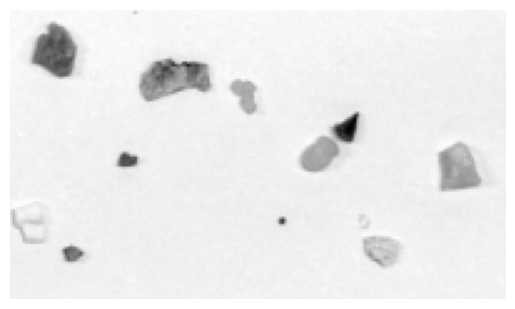

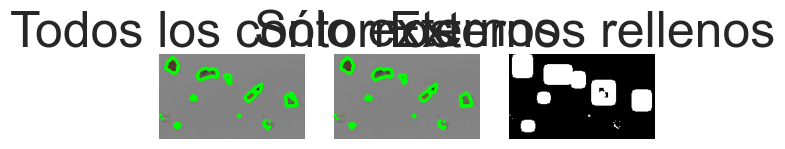

In [280]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgT = cv2.imread('FRA4.png') 
#imgT = cv2.imread('PEL4.png') 
#imgT = cv2.imread('AL4.png') 



#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(imgT, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral =105
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)



#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(imgT, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(imgT, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
comparador = []
colores = []
number = 0
radios = []
elipses = []
perimetros = []
areas = []
circulos = []
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
            #Área delcontorno
            area = cv2.contourArea(c)

            #Dimensión mínima (útil en ocasiones)
            if area > 10:

                #Perímetro delcontorno
                perimetro = cv2.arcLength(c,True)
                #Contenedor alineado con ejes de la imagen
                x,y,w,h = cv2.boundingRect(c)
                #Mínimo contenedor ajustado para el contorno
                rect = cv2.minAreaRect(c)
                rango = img_gris[y:y+h,x:x+w]
                
                colores.append(np.mean(rango))
                #Mínimo círculo que lo contiene
                (cx,cy),radio = cv2.minEnclosingCircle(c)
                #Elipse ajustada al contorno
                if c.shape[0] > 5:
                    elipse = cv2.fitEllipse(c)
                    #Para determinadas tareas nos interesará mostrar estos valores
                    #print(area, perimetro, rect, cx,cy,radio, elipse)
                    radios.append(radio)
                    elipses.append(elipse[2])
                    perimetros.append(perimetro)
                    areas.append(area)
                    
                    area_calculada = (radio**2)*np.pi
                    if(abs(area - area_calculada) < 0.15 * area):
                           circulos.append(area_calculada)
                           





            #Dibuja los contornos
            cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)
            cv2.rectangle(img_cont,(x,y),(x+w,y+h),(255,255,255),10,1)
plt.subplot(133)
plt.axis("off")
coloresF =  np.mean(colores)
radiosF = np.mean(radios)
elipsesF = np.mean(elipses)
perimetrosF = np.mean(perimetros)
areasF = np.mean(areas)
circulosF = np.mean(circulos)
print(np.mean(colores))
print(np.mean(radios))
print(np.mean(elipses))
print(np.mean(perimetros))
print(np.mean(areas))
print(np.mean(circulos))
if circulosF > 100:
       print("PELL")
elif coloresF <= 80:
       print("ALQUITRAN")
else:
       print("FRAG")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()